## Purposes

* Study and preprocess the data for the churn problem.

* Learn to apply decision trees to solve the problem and evaluate the model's results.

## What is included in the practical work

* Data loading and preprocessing.
* Application and configuration of linear models.
* Applying and configuring the decision tree.
* Model comparison.
* Assessment of the importance of the signs.

###### Solve the classification problem of churned telecom customers: for each customer, determine whether they will stop using the operator's services in the near future or not. 

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

## Data Collection

In [10]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data Preparation

1. Drop the State column.

2. Encode the International plan and Voice mail plan columns as follows: replace Yes with 1 and No with 0.

3. Convert the target variable (Churn) to numbers: replace True with 1 and False with 0.

In [11]:
df = df.drop('State', axis=1)

In [12]:
df['International plan'] = df['International plan'].replace({'Yes': 1 , 'No': 0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({'Yes': 1, 'No':0}).astype(int)
df['Churn'] = df['Churn'].replace({True: 1, False:0}).astype(int)

In [13]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Create the object-feature matrix 𝑋 and the target variable vector 𝑦 (Churn).

In [14]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [15]:
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

The sample is unbalanced.

Split the data into training and testing sets, with the test set size being 30%.

In [16]:
X_train, X_test, y_train, Y_test = train_test_split(X , y , test_size=0.3, random_state = 123)

For linear models, feature scaling is very important. Therefore, scale the features using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), fitting the method on the training data and applying it to both the training and testing sets.

In [17]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

After scaling the features, X_train and X_test are no longer pd.DataFrame objects, which is inconvenient. Convert them back to pd.DataFrame.

In [18]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns = X_train.columns, index=X_train.index)
X_test_sc_df = pd.DataFrame(X_test_sc, columns = X_test.columns, index=X_test.index)

## Model Training and Evaluation

Train on the training data with default parameters:

1) Logistic Regression;

2) SVC (kernel='linear').

In [20]:
logreg = LogisticRegression()
svc = SVC(kernel = 'linear', probability=True)

logreg.fit(X_train_sc_df, y_train)
svc.fit(X_train_sc_df, y_train)

SVC(kernel='linear', probability=True)

Using the trained models, make predictions on the test data. Calculate the ROC-AUC metric on the test set.

To correctly compute the ROC-AUC, you need to predict not the classes themselves, but their probabilities (to allow SVC to do this, set probability=True when declaring the model).

In [24]:
pred_logreg = logreg.predict_proba(X_test)[:,1]
pred_svc = svc.predict_proba(X_test)[:,1]

print(f"Roc auc:\nLogisticRegression: {roc_auc_score(Y_test , pred_logreg)}\nSVC: {roc_auc_score(Y_test , pred_svc)}")

Roc auc:
LogisticRegression: 0.5005773672055427
SVC: 0.4475371410844162


Now I will train a decision tree with default parameters on the training data, make predictions on the test data, and calculate the ROC-AUC on the test set.

In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_sc_df, y_train)

pred_dtc = dtc.predict_proba(X_test)[:,1]
roc_auc_score(Y_test , pred_dtc)

0.41269690806935305

Let's try not to scale the features for the decision tree.

In [27]:
dtc_no_scaler = DecisionTreeClassifier()
dtc_no_scaler.fit(X_train, y_train)

pred_dtc_no_scaler = dtc_no_scaler.predict_proba(X_test)[:,1]
roc_auc_score(Y_test , pred_dtc_no_scaler)

0.845687842542484

Decision trees, like their ensembles (such as random forests), are based on splitting the feature space using threshold values. They operate on the relative values of the features rather than their scale. This means that, unlike linear models (such as logistic regression), it is not necessary to standardize or normalize the data before training when using decision trees.

## Model Improvement (Hyperparameter Tuning)

Now my goal is to improve the models as much as possible.

1) for linear models, we select the hyperparameter C (go through 20 values ​​of C in the range from 0.1 to 10 with an equal step);

2) for the decision tree, select max_depth (go through the depth from 1 to 10 with a step of 1) and criterion — gini or entropy 

To select parameters, use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)with five folds and roc-auc metric.



After selecting hyperparameters, train models with the found hyperparameters on training data, make predictions on the test and evaluate their quality (roc_auc).

In [57]:
def GridSearch(model , param_grid, x_train, y_train):
    grid_search = GridSearchCV(
        estimator = model,
        param_grid = param_grid,
        scoring = 'roc_auc',
        cv = 5,
        n_jobs = -1
    )
    
    grid_search.fit(x_train, y_train)
    print("Best param:", grid_search.best_params_)
    print("Best ROC-AUC:", grid_search.best_score_)
    

In [58]:
param_grid_logreg = {
    'C': np.linspace(0.1, 10, 20)
}
GridSearch(logreg, param_grid_logreg, X_train_sc_df, y_train)

Best param: {'C': 4.7894736842105265}
Best ROC-AUC: 0.8098747681454942


In [56]:
logreg = LogisticRegression(C = 4.789)
logreg.fit(X_train_sc_df, y_train)
pred_logreg = logreg.predict_proba(X_test_sc_df)[:,1]
score_logreg = roc_auc_score(Y_test, pred_logreg)
score_logreg

0.8234462789976217

In [20]:
param_grid_svc = {
    'C': np.linspace(0.1, 10, 20)
}
GridSearch(svc, param_grid_svc, X_train_sc_df, y_train)

Best param: {'C': 0.1}
Best ROC-AUC: 0.7382997457403329


In [62]:
svc = SVC(kernel = 'linear',C = 0.1, probability=True)
svc.fit(X_train_sc_df, y_train)
pred_svc = svc.predict_proba(X_test_sc_df)[:,1]
score_svc = roc_auc_score(Y_test, pred_svc)
score_svc

0.7692427010444314

In [35]:
param_grid_dtc_no_scaler = {
    'max_depth': np.arange(1,11,1),
    'criterion': ['gini','entropy']
}
GridSearch(dtc_no_scaler, param_grid_dtc_no_scaler, X_train, y_train)

Best param: {'criterion': 'gini', 'max_depth': 5}
Best ROC-AUC: 0.8839724572571468


In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc_no_scaler.predict_proba(X_test)[:,1]
score_dtc = roc_auc_score(Y_test, pred_dtc)
score_dtc

0.8505739202371514

Draw the roc curve for the best model.

Text(0.5, 0, 'True Pos rate')

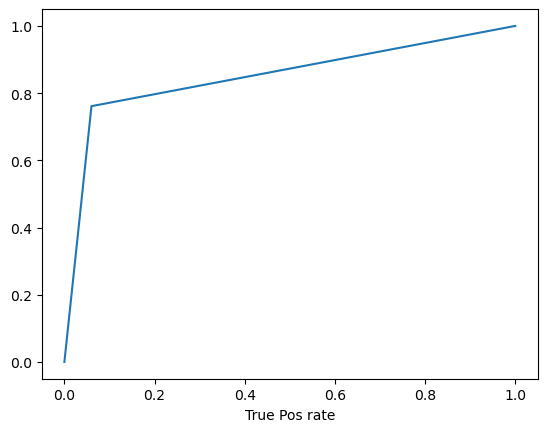

In [65]:
fpr, tpr, _ = roc_curve(Y_test, pred_dtc)

plt.plot(fpr,tpr)
plt.xlabel('False Pos rate')
plt.xlabel('True Pos rate')

Let’s compare the two best models:

	1.	Calculate the difference in the ROC-AUC scores.
	2.	Plot histograms of feature importance (for linear models, take the absolute values of the weights) for each model.
	3.	Compare the lists of the top three most important features for each model.

The features identified as most important differ across models.

In [66]:
score_dtc - score_logreg

0.02712764123952971

In [85]:
importances

array([0.03713403, 0.00175014, 0.05603782, 0.00973371, 0.05878185,
       0.02008438, 0.02291102, 0.28763742, 0.1065223 , 0.02285957,
       0.03184825, 0.0265907 , 0.01097611, 0.02679606, 0.08093137,
       0.0654081 , 0.01373759, 0.1202596 ])

Top 3 features: [ 1  3 12 16  5  9  6 11 13 10  0  2  4 15 14  8 17  7]


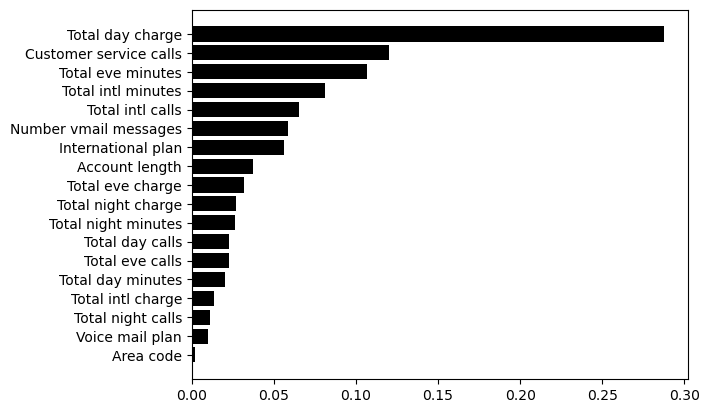

In [78]:
feature = X_train.columns
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], color='black', align = 'center')
plt.yticks(range(len(indices)),[feature[i] for i in indices])

print(f"Top 3 features: {np.argsort(importances)}")

Top 3 features: [14 12 11  9  1 13  6  0 10  8 16 15  5  7  2  4 17  3]


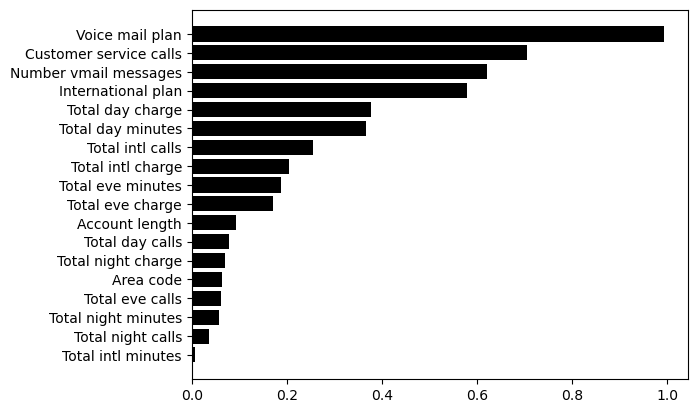

In [83]:
weights = logreg.coef_[0]
abs_weights = np.abs(weights)
indices = np.argsort(abs_weights)

plt.barh(range(len(indices)), abs_weights[indices], color='black', align='center')
plt.yticks(range(len(indices)),[feature[i] for i in indices])
print(f"Top 3 features: {np.argsort(abs_weights)}")

In [84]:
weights

array([ 0.09342339, -0.06402286,  0.57829539, -0.99362109,  0.621619  ,
        0.36567392,  0.07739406,  0.37700128,  0.18695002,  0.06065739,
        0.17062485,  0.05767265,  0.03660831,  0.07031192,  0.00758936,
       -0.25589092,  0.20559881,  0.70624899])

Conclusions:

1. Data Imbalance: The data is imbalanced, meaning the number of examples in each class varies significantly. Imbalanced data can lead the model to favor the most prevalent class, potentially overlooking the minority class.

2. Decision Tree Performance: The decision tree model demonstrated the best performance after hyperparameter tuning. This suggests that the model effectively distinguished between classes, achieving high accuracy even with the data imbalance.

3. Feature Importance Differences: Different features were emphasized by each model. Logistic regression assumes a linear relationship between features and the target variable, while the decision tree captures more complex interactions among features. As a result, feature importance varies between models, reflecting their distinct internal structures and interpretative approaches.